# Predicting prices of players from the top 5 football leagues

## Summary

## Step 1: Librairies import

In [51]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)

# Beautiful Soup for Web scrapping
import requests
from bs4 import BeautifulSoup

# Seaborn for data visualization
import seaborn as sns
sns.set_theme()

# Numpy and SKLearn for modelization
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Step 2: Data visualization

### Dataset overview

In [2]:
DATA = pd.read_csv("dataset_football_cleaned.csv")

# Select the top 5 leagues

selected_leagues = ['PremierLeague','SerieA','Bundesliga','Ligue1','LaLiga']
DATA = DATA[DATA.league.isin(selected_leagues)]

# Delete "fake" Premier League and BundesLiga

# 1. Egyptian premier league players are after the index 4920
DATA = DATA[DATA.index<4920]

# 2. Austrian bundesliga players are between the indexes 2702 and 2871 included
before_2072 = DATA[DATA.index<2702]
after_2871 = DATA[DATA.index>2871]
DATA = pd.concat([before_2072,after_2871],axis=0)
# Not very elegant but working

DATA

name     first_name  age                  nation  \
0              Etheridge           Neil   28             Philippines   
42               Hoilett         Junior   28                  Canada   
43          Mendez0Laing      Nathaniel   26                 England   
44                Murphy           Josh   23                 England   
45                  Reid          Bobby   25                 England   
46                Harris         Kadeem   25                 England   
47                Bacuna        Leandro   27                 Curacao   
48                Damour           Loïc   28                  France   
49              Paterson         Callum   24                Scotland   
50               O'Keefe         Stuart   27                 England   
51            Gunnarsson           Aron   29                 Iceland   
52              Camarasa         Víctor   24                   Spain   
53                 Ralls            Joe   25                 England   
54                 Arter          Harry   29                 Ireland   
55                Murphy          Brian   35                 Ireland   
66              Smithies           Alex   28                 England   
87             Knockaert        Anthony   27                  France   
88               Walters       Jonathan   35                 Ireland   
89                Lennon          Aaron   31                 England   
90              Hendrick           Jeff   27                 Ireland   
91                 Brady         Robbie   27                 Ireland   
92                Defour         Steven   30                 Belgium   
93           Gudmundsson     JohannBerg   28                 Iceland   
94              Westwood         Ashley   28                 England   
95              Mitchell          Conor   22         NorthernIreland   
96              Legzdins           Adam   32                 England   
97            Lindegaard         Anders   34                 Denmark   
98                Heaton            Tom   32                 England   
99                  Pope           Nick   26                 England   
100                 Hart            Joe   31                 England   
101               Mbenza          Isaac   22                 Belgium   
102               Sabiri     Abdelhamid   22                 Germany   
103             Kachunga          Elias   26                 DRCongo   
104            Pritchard           Alex   25                 England   
105             Puncheon          Jason   32                 England   
106                 Mooy          Aaron   28               Australia   
107               Bacuna        Juninho   21             Netherlands   
108             Williams          Danny   29            UnitedStates   
109                 Hogg       Jonathan   30                 England   
110              Coleman           Joel   23                 England   
111                Hamer            Ben   31                 England   
112          Jahanbakhsh        Alireza   25                    Iran   
113            Izquierdo           José   26                Colombia   
114                 Groß         Pascal   27                 Germany   
115                Lössl          Jonas   30                 Denmark   
116                March          Solly   24                 England   
117                Kayal          Beram   30                  Israel   
118             Stephens           Dale   29                 England   
119             Bissouma           Yves   22                    Mali   
120              Pröpper           Davy   27             Netherlands   
121               Steele          Jason   28                 England   
122               Button          David   29                 England   
123                 Ryan         Mathew   26               Australia   
124             Deulofeu         Gerard   24                   Spain   
125              Success          Isaac   23                

In [3]:
DATA.describe()

age  goals_selection  selections_nation         price  \
count  1312.000000      1312.000000        1312.000000  1.312000e+03   
mean     25.995427         1.887195          15.163110  1.133218e+07   
std       4.436687         5.629232          24.062452  1.941081e+07   
min      17.000000         0.000000           0.000000  5.000000e+04   
25%      23.000000         0.000000           1.000000  1.500000e+06   
50%      26.000000         0.000000           5.000000  4.500000e+06   
75%      29.000000         1.000000          18.000000  1.300000e+07   
max      41.000000        85.000000         176.000000  2.000000e+08   

       end_contract   goal_champ  assist_champ  own_goal_champ  sub_on_champ  \
count   1297.000000  1312.000000   1312.000000     1312.000000   1312.000000   
mean       2.812645    22.663872     18.853659        0.205030     33.150915   
std        1.400913    30.069647     22.949550        0.509144     28.116600   
min        1.000000     0.000000      0.000000        0.000000      0.000000   
25%        2.000000     1.000000      0.000000        0.000000      6.000000   
50%        3.000000    15.000000     12.000000        0.000000     30.000000   
75%        4.000000    32.000000     28.000000        0.000000     50.000000   
max        8.000000   423.000000    174.000000        4.000000    216.000000   

       sub_out_champ  yellow_card_champ  second_yellow_card_champ  \
count    1312.000000        1312.000000               1312.000000   
mean       43.851372          25.426829                  0.688262   
std        39.571349          22.858584                  1.138568   
min         0.000000           0.000000                  0.000000   
25%         7.000000           9.000000                  0.000000   
50%        35.000000          19.000000                  0.000000   
75%        67.000000          35.000000                  1.000000   
max       222.000000         141.000000                  9.000000   

       red_card_champ  penalty_goal_champ  conceded_goal_champ  \
count     1312.000000         1312.000000          1312.000000   
mean         0.731707           52.354421            13.733994   
std          1.038379          119.305287            34.309514   
min          0.000000            0.000000             0.000000   
25%          0.000000            0.000000             0.000000   
50%          0.000000            1.000000             0.000000   
75%          1.000000            9.250000             0.000000   
max          8.000000          791.000000           333.000000   

       clean_sheet_champ     goal_cup   assist_cup  own_goal_cup   sub_on_cup  \
count             1312.0  1312.000000  1312.000000   1312.000000  1312.000000   
mean                 0.0     1.882622     1.564787      0.031250     3.047256   
std                  0.0     3.818731     3.110781      0.186744     3.971972   
min                  0.0     0.000000     0.000000      0.000000     0.000000   
25%                  0.0     0.000000     0.000000      0.000000     0.000000   
50%                  0.0     0.000000     0.000000      0.000000     2.000000   
75%                  0.0     2.000000     2.000000      0.000000     5.000000   
max                  0.0    63.000000    39.000000      2.000000    28.000000   

       sub_out_cup  yellow_card_cup  second_yellow_card_cup  red_card_cup  \
count  1312.000000      1312.000000             1312.000000   1312.000000   
mean      3.244665         1.570884                0.043445      3.054878   
std       4.361301         2.503302                0.203935      8.674205   
min       0.000000         0.000000                0.000000      0.000000   
25%       0.000000         0.000000                0.000000      0.000000   
50%       2.000000         0.000000                0.000000      0.000000   
75%       5.000000         2.000000                0.000000      0.000000   
max      35.000000        19.000000                1.000000     60.000000   

    

<AxesSubplot:xlabel='price', ylabel='position'>

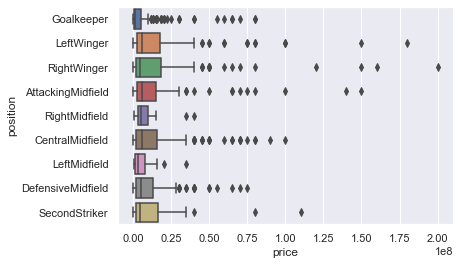

In [4]:
# Box Plotting price against the different positions
sns.boxplot(x="price", y="position", data=DATA)

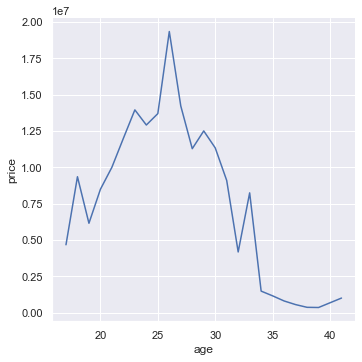

In [5]:
# Curve of the price against the age 
means = DATA.groupby('age', as_index=False)['price'].mean()
sns.relplot(x="age",y="price",kind="line",data=means)
# As exepected, the wingers have the highest price values among all positions 

<AxesSubplot:>

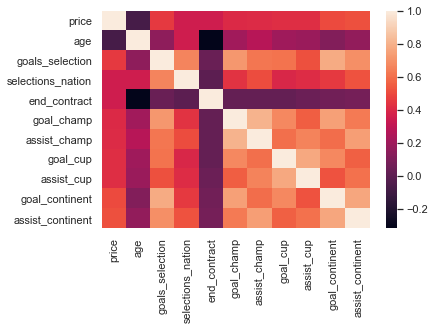

In [6]:
# Correlation matrix with the variables that seems to explains the best a player's price
DATA_corr = DATA[["price","age","goals_selection","selections_nation","end_contract","goal_champ",
                "assist_champ","goal_cup","assist_cup","goal_continent","assist_continent"]]
corr = DATA_corr.corr()
sns.heatmap(corr)
# Logically, a player's price tends to be at his peak when he is around 26 
# It then slowly decreases untill the minimum low when the player is around 40

In [7]:
# The results are quite unexpected, we can see that the age seems to have very low correlation with the price 
# On the opposite, the number of assists of a player for his nation in continental cups seems to be very correlated with the
# price, which we expected to be less than the end of contrat for example

## Step 3: Data pre-processing

### Issue 1: Get dummies for positions

In [8]:
# Necessary to apply regression algorithms
dum_position = pd.get_dummies(DATA['position'], columns=["position"])
DATA = DATA.drop(['position'],axis=1)
DATA = pd.concat([DATA,dum_position],axis=1)

### Issue 2: Delete goalkeepers and related variables

In [9]:
# Delete goalkeepers rows
DATA = DATA[DATA.Goalkeeper != 1]

# Delete columns related to them
DATA.drop(["Goalkeeper","conceded_goal_champ","clean_sheet_champ","conceded_goal_cup","clean_sheet_cup",
           "conceded_goal_continent","clean_sheet_continent"],axis=1,inplace=True)

### Issue 3: Sum yellow cards from championship, cup and continent (same for red cards)

In [10]:
# Create two new columns with the sum of yellow and red cards 
yellow_cards = DATA.yellow_card_champ + DATA.yellow_card_continent + DATA.yellow_card_cup
red_cards = DATA.red_card_champ + DATA.red_card_continent + DATA.red_card_cup 
cards = pd.DataFrame({"yellows_cards":yellow_cards,"red_cards":red_cards})

# Drop the old columns 
DATA.drop(["yellow_card_champ","yellow_card_continent","yellow_card_cup",
           "red_card_champ","red_card_continent","red_card_cup",
           "second_yellow_card_cup","second_yellow_card_champ","second_yellow_card_continent"],axis=1,inplace=True)

# Concat the two new columns 
DATA = pd.concat([DATA,cards],axis=1)

### Issue 4: Take out the sub on/out columns

In [11]:
DATA.drop(["sub_on_champ","sub_out_champ",
           "sub_on_cup","sub_out_cup",
           "sub_on_continent","sub_out_continent"],axis=1,inplace=True)

### Issue 5: Take out the identifiers

In [12]:
DATA.drop(["name","first_name"],axis=1,inplace=True)

### Issue 6: Team, league and nation variables valuation

#### 1. Team valuation using UEFA index

In [13]:
# Web scrapping on a website displaying the UEFA index on the last 5 years in English
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}

page = "https://kassiesa.net/uefa/data/method5/trank2020.html"
pageTree = requests.get(page, headers=headers)
pageSoup = BeautifulSoup(pageTree.content, 'html.parser')

# Finding the values we are looking for
teams = pageSoup.find_all("td",{'align': 'left'})
scores = pageSoup.find_all("th",{'class':'lgray'})

# Creating the dataframe with the teams and their coefficients 
teams_List = []
scores_List = []
for i in range(400):
    teams_List.append(teams[i+1].text)
    scores_List.append(scores[i].text)
    
UEFA_club_coefficients = pd.DataFrame({"Team":teams_List,"Coefficient":scores_List})
UEFA_club_coefficients

Team Coefficient
0              Bayern München     136.000
1                 Real Madrid     134.000
2                FC Barcelona     128.000
3             Atlético Madrid     127.000
4                    Juventus     117.000
5             Manchester City     116.000
6         Paris Saint-Germain     113.000
7                     Sevilla     102.000
8           Manchester United     100.000
9                   Liverpool      99.000
10                    Arsenal      91.000
11           Shakhtar Donetsk      85.000
12          Borussia Dortmund      85.000
13          Tottenham Hotspur      85.000
14             Olympique Lyon      83.000
15                    Chelsea      83.000
16                    AS Roma      80.000
17                     Napoli      77.000
18                   FC Porto      75.000
19                    Benfica      70.000
20                       Ajax      69.500
21       Zenit St. Petersburg      64.000
22           Bayer Leverkusen      61.000
23                   FC Basel      58.500
24                 Villarreal      56.000
25                Dinamo Kiev      55.000
26                   Valencia      54.000
27                   Besiktas      54.000
28                FC Salzburg      53.500
29         Sporting CP Lisbon      50.000
30                 RB Leipzig      49.000
31                 Schalke 04      46.000
32             Internazionale      44.000
33                CSKA Moscow      44.000
34         Olympiakos Piraeus      43.000
35               FC København      42.000
36             Sporting Braga      41.000
37                      Lazio      41.000
38                  AS Monaco      41.000
39                    AA Gent      39.500
40              PSV Eindhoven      37.000
41              VfL Wolfsburg      36.000
42                 Anderlecht      36.000
43            Athletic Bilbao      36.000
44               FK Krasnodar      35.500
45                     Celtic      34.000
46             Viktoria Plzen      34.000
47                   Atalanta      33.500
48              Dinamo Zagreb      33.500
49        Eintracht Frankfurt      33.000
50           Lokomotiv Moscow      33.000
51                 Fenerbahçe      31.500
52        Olympique Marseille      31.000
53               Sparta Praha      30.500
54                Racing Genk      30.000
55                  FK Astana      29.000
56                Club Brugge      28.500
57              APOEL Nicosia      27.500
58               Slavia Praha      27.500
59         Ludogorets Razgrad      26.000
60   Borussia Mönchengladbach      26.000
61                 Young Boys      25.500
62               BATE Borisov      24.000
63                Galatasaray      23.500
64          Red Star Belgrade      22.750
65                   Malmö FF      22.000
66          Partizan Belgrade      22.000
67           AS Saint-Étienne      22.000
68                 Rapid Wien      22.000
69             Leicester City      22.000
70        Istanbul Basaksehir      21.500
71                 Qarabag FK      21.000
72          PAOK Thessaloniki      21.000
73             Standard Liège      20.500
74                       FCSB      20.500
75                     Getafe      20.456
76                   Espanyol      20.456
77                 Real Betis      20.456
78              Real Sociedad      20.456
79              Celta de Vigo      20.456
80                   AC Milan      19.000
81                 Fiorentina      19.000
82                 AZ Alkmaar      18.500
83             Spartak Moscow      18.500
84    Wolverhampton Wanderers      18.092
85                 Burnley FC      18.092
86                    Everton      18.092
87             Southampton FC      18.092
88            West Ham United      18.092
89                  Feyenoord      17.000
90               Legia Warsaw      17.000
91                 AEK Athens      16.500
92           Maccabi Tel-Aviv      16.500
93            Glasgow Rangers      16.250
94                   Molde FK      

#### 2. League valuation using UEFA index

In [14]:
# No web scrapping needed here because we are only considering the top 5 leagues and it could be done manually
leagues = ['PremierLeague','SerieA','Bundesliga','Ligue1','LaLiga']
coefficients = [90.462,70.653,74.784,59.248,102.283]
UEFA_league_coefficients = pd.DataFrame({"League":leagues,"Coefficient":coefficients})
UEFA_league_coefficients.sort_values(by=["Coefficient"],inplace=True,ascending=False)
UEFA_league_coefficients

League  Coefficient
4         LaLiga      102.283
0  PremierLeague       90.462
2     Bundesliga       74.784
1         SerieA       70.653
3         Ligue1       59.248

#### 3. Nation valuation using FIFA index

In [15]:
# We scrapping on the official FIFA website to get the actual nations ranking 
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}

page = "https://www.fifa.com/fifa-world-ranking/ranking-table/men/"
pageTree = requests.get(page, headers=headers)
pageSoup = BeautifulSoup(pageTree.content, 'html.parser')

# Finding the values we are looking for
nations = pageSoup.find_all("div", {"class": "fi-t__n"})
points = pageSoup.find_all("td", {"class": "fi-table__td fi-table__points"})

# Creating the dataframe with the  and their coefficients 
nation_list=[]
points_list=[]
for i in range(len(nations)):
    nation = nations[i].text[1:]
    nation = nation[:nation.index('\n')] 
    nation_list.append(nation)
    points_list.append(points[i].text)
    
Nations_ranking = pd.DataFrame({"Nations" : nation_list, "Points":points_list})
Nations_ranking

Nations Points
0                           Belgium   1780
1                            France   1755
2                            Brazil   1743
3                           England   1670
4                          Portugal   1662
5                             Spain   1645
6                         Argentina   1642
7                           Uruguay   1639
8                            Mexico   1632
9                             Italy   1625
10                          Croatia   1617
11                          Denmark   1614
12                          Germany   1610
13                      Netherlands   1609
14                         Colombia   1601
15                      Switzerland   1593
16                            Chile   1567
17                            Wales   1562
18                           Poland   1559
19                          Senegal   1558
20                           Sweden   1558
21                              USA   1545
22                          Austria   1531
23                          Ukraine   1521
24                             Peru   1512
25                          Tunisia   1503
26                            Japan   1502
27                        Venezuela   1501
28                          IR Iran   1496
29                           Serbia   1495
30                          Algeria   1488
31                           Turkey   1487
32                         Slovakia   1478
33                         Paraguay   1476
34                          Morocco   1474
35                          Nigeria   1474
36                          Romania   1466
37                   Korea Republic   1465
38                           Russia   1461
39                          Hungary   1460
40                        Australia   1457
41                   Czech Republic   1456
42              Republic of Ireland   1456
43                           Norway   1450
44                 Northern Ireland   1440
45                          Iceland   1438
46                          Jamaica   1437
47                         Scotland   1436
48                            Egypt   1432
49                         Cameroon   1428
50                       Costa Rica   1427
51                            Ghana   1424
52                           Greece   1413
53                          Finland   1411
54           Bosnia and Herzegovina   1410
55                          Ecuador   1409
56                             Mali   1408
57                     Burkina Faso   1391
58                            Qatar   1391
59                         Congo DR   1386
60                    Côte d'Ivoire   1384
61                         Slovenia   1379
62                       Montenegro   1370
63                         Honduras   1367
64                  North Macedonia   1362
65                          Albania   1360
66                     Saudi Arabia   1353
67                         Bulgaria   1350
68                             Iraq   1347
69                      El Salvador   1346
70                     South Africa   1341
71                           Canada   1332
72                           Guinea   1329
73             United Arab Emirates   1326
74                         China PR   1323
75                          Curaçao   1313
76                            Syria   1313
77                           Panama   1311
78                           Uganda   1307
79                          Bolivia   1307
80                       Cabo Verde   1306
81                             Oman   1303
82                            Benin   1302
83                            Haiti   1285
84                       Uzbekistan   1283
85                            Gabon   1280
86                           Israel   1279
87                          Belarus   1269
88                          Georgia   1267
89                           Zambia   1265
90                            Congo   1264
91                          Lebanon   1263
92                          V

#### 4. Replacing names

In [16]:
# Names need to be corrected because the nomenclature is different between web sources
# No other way to do it rather than manually

# For UEFA teams index 
DATA.replace({"BayernMunich":"BayernMünchen"}, inplace = True)
DATA.replace({"E.Frankfurt":"EintrachtFrankfurt"}, inplace = True)
DATA.replace({"Monaco":"ASMonaco"}, inplace = True)
DATA.replace({"Bor.Dortmund ":"BorussiaDortmund"}, inplace = True)
DATA.replace({"Bor.M'gladbach":"BorussiaMönchengladbach"}, inplace = True)
DATA.replace({"Athletic ":"AthleticBilbao"}, inplace = True)
DATA.replace({"1.FSVMainz05":"FSVMainz05"}, inplace = True)
DATA.replace({"FCSchalke04":"Schalke04"}, inplace = True)
DATA.replace({"Leicester":"LeicesterCity"}, inplace = True)
DATA.replace({"Burnley ":"BurnleyFC"}, inplace = True)
DATA.replace({"Marseille":"OlympiqueMarseille"}, inplace = True)
DATA.replace({"ParisSG":"ParisSaint-Germain"}, inplace = True)
DATA.replace({"Inter ":"Internazionale"}, inplace = True)
DATA.replace({"SevillaFC":"Sevilla"}, inplace = True)
DATA.replace({"R.Strasbourg":"RCStrasbourg"}, inplace = True)
DATA.replace({"G.Bordeaux":"GirondinsBordeaux"}, inplace = True)
DATA.replace({"ManUtd ":"ManchesterUnited"}, inplace = True)
DATA.replace({"ManCity":"ManchesterCity"}, inplace = True)
DATA.replace({"RapidVienna  ":"RapidWien"}, inplace = True)
DATA.replace({"SSCNapoli":"Napoli"}, inplace = True)
DATA.replace({"Bay.Leverkusen":"BayerLeverkusen"}, inplace = True)
DATA.replace({"LOSCLille ":"LilleOSC"}, inplace = True)
DATA.replace({"TSGHoffenheim":"1899Hoffenheim"}, inplace = True)
DATA.replace({"Saint0Étienne ":"ASSaint-Étienne"}, inplace = True)
DATA.replace({"Spurs":"TottenhamHotspur"}, inplace = True)
DATA.replace({"WestHam ":"WestHamUnited"}, inplace = True)
DATA.replace({"Southampton ":"SouthamptonFC"}, inplace = True)
DATA.replace({"Wolves ":"WolverhamptonWanderers"}, inplace = True)

# 2. For FIFA nations index
DATA.replace({"Coted'Ivoire":"Côte d'Ivoire"}, inplace = True)
DATA.replace({"UnitedStates":"USA"}, inplace = True)
DATA.replace({"CzechRepublic":"Czech Republic"}, inplace = True)
DATA.replace({"DRCongo":"Congo DR"}, inplace = True)
DATA.replace({"Bosnia0Herzegovina":"Bosnia and Herzegovina"}, inplace = True)
DATA.replace({"Korea,South":"Korea Republic"}, inplace = True)
DATA.replace({"SouthAfrica":"South Africa"}, inplace = True)
DATA.replace({"BurkinaFaso":"Burkina Faso"}, inplace = True)
DATA.replace({"China":"China PR"}, inplace = True)
DATA.replace({"Macedonia":"North Macedonia"}, inplace = True)
DATA.replace({"Iran":"IR Iran"}, inplace = True)
DATA.replace({"Ireland":"Republic of Ireland"}, inplace = True)
DATA.replace({"Curacao":"Curaçao"}, inplace = True)
DATA.replace({"EquatorialGuinea":"Equatorial Guinea"}, inplace = True)
DATA.replace({"Guinea0Bissau":"Guinea-Bissau"}, inplace = True)
DATA.replace({"TrinidadandTobago":"Trinidad and Tobago"}, inplace = True)
DATA.replace({"CentralAfricanRepublic":"Central African Republic"}, inplace = True)
DATA.replace({"SierraLeone":"Sierra Leone"}, inplace = True)

#### 5. Replacing the strings in DATA by the corresponding value from the UEFA/FIFA indexes

In [17]:
# For clubs (maybe long ~ 1 min)
for i in range(120):
    current_team = UEFA_club_coefficients.iloc[i][0].replace(" ","")
    coeff = float(UEFA_club_coefficients.iloc[i][1])
    for j in range(len(DATA.team)):
        team = DATA.iloc[j][3]
        if team == current_team:
            DATA.replace({team:coeff}, inplace = True)
   
# if the club is not found in the UEFA index (meaning is has not been performing in continental 
# competition within the last 5 years), his score equals to 0 
for i in range(len(DATA.team)):
    if type(DATA.iloc[i][3]) == str:
        DATA.replace({DATA.iloc[i][3]:0}, inplace = True)

In [18]:
# For leagues
for i in range(len(UEFA_league_coefficients.League)):
    current_league = UEFA_league_coefficients.iloc[i][0]
    coeff = float(UEFA_league_coefficients.iloc[i][1])
    for j in range(len(DATA.team)):
        league = DATA.iloc[j][2]
        if league == current_league:
            DATA.replace({league:coeff}, inplace = True)

In [19]:
# For nations (maybe long ~ 1 min)
for i in range(len(Nations_ranking.Nations)):
    current_nation = Nations_ranking.iloc[i][0]
    coeff = float(Nations_ranking.iloc[i][1])
    for j in range(len(DATA.team)):
        nation = DATA.iloc[j][1]
        if nation == current_nation:
            DATA.replace({nation:coeff}, inplace = True)

In [28]:
DATA.drop([105,270,426,445,698,728,805],inplace=True) # Deleting NaN
DATA["nation"] = DATA["nation"].astype(float) # Converting object type to float for regression

In [ ]:
def nans(df): return df[df.isnull().any(axis=1)]
nans(DATA)

In [29]:
# Data overview after pre-processing
DATA
# We now only have quantitative variables and we are able to star the regression

age  nation   league     team  goals_selection  selections_nation  \
0      21  1645.0  102.283    0.000                1                  2   
1      28  1625.0   70.653    0.000                0                  1   
2      27  1670.0   90.462    0.000                3                 13   
3      25  1662.0   90.462    0.000                0                  2   
4      28  1743.0   70.653  117.000                3                 31   
5      24  1487.0   70.653   19.000                9                 39   
6      28  1610.0   74.784   14.956                0                  1   
7      29  1670.0   90.462    0.000                0                  0   
8      27  1755.0   59.248    0.000                0                  0   
9      28  1645.0  102.283    0.000                0                  1   
10     32  1645.0  102.283    0.000                0                  2   
11     21  1474.0   59.248   11.849                1                  5   
12     23  1610.0   74.784    0.000                0                  5   
13     21  1743.0  102.283  128.000                0                  0   
14     20  1610.0   74.784   46.000                0                  2   
15     20  1558.0   70.653    0.000                0                  0   
16     30  1408.0   90.462    0.000                9                 19   
17     27  1645.0  102.283  127.000                0                 44   
18     29  1610.0   74.784    0.000               10                 37   
19     26  1386.0   90.462    0.000                0                  1   
20     30  1264.0   59.248    0.000                7                 39   
21     22  1755.0   59.248    0.000                0                  0   
22     19  1428.0   74.784   33.000                0                  0   
23     31  1755.0   90.462    0.000                5                 41   
24     31  1625.0   70.653    0.000                0                  0   
25     25  1625.0   70.653    0.000                0                  0   
26     21  1531.0   74.784   49.000                2                 13   
27     25  1610.0   59.248  113.000                6                 49   
28     24  1495.0   90.462    0.000                3                 22   
29     20  1670.0   70.653   14.130                0                 11   
30     25  1662.0   90.462   18.092                0                 29   
31     22  1610.0   74.784    0.000                0                  0   
32     25  1558.0   90.462    0.000                0                  6   
33     29  1558.0   90.462    0.000                3                 55   
34     27  1610.0   74.784   26.000                0                 12   
35     27  1625.0   70.653   77.000                4                 30   
36     21  1743.0   70.653   19.000                0                 10   
37     24  1424.0  102.283    0.000                0                  3   
38     21  1670.0   59.248    0.000                0                  1   
39     32  1558.0   59.248    0.000                0                  4   
40     24  1645.0  102.283    0.000                0                  0   
41     20  1645.0  102.283    0.000                0                  0   
42     22  1474.0   59.248    0.000                0                 14   
43     22  1545.0   90.462    0.000                0                  2   
44     31  1567.0  102.283  128.000               26                105   
45     26  1625.0   70.653   77.000                0                  4   
46     21  1755.0   59.248   11.849                0                  0   
47     38  1755.0   59.248    0.000                0                  3   
48     22  1593.0   70.653   19.000                0                  8   
49     22  1558.0  102.283   20.456                0                  4   
50     24  1341.0   59.248    0.000                1                  6   
51     35  1502.0   74.784   33.000                2                114   
52     30  1642.0  102.283    0

## Step 4: Modelization

In [31]:
Y = DATA["price"]
X = DATA.loc[:, DATA.columns != 'price']
# Shuffle
DATA = DATA.sample(frac=1).reset_index(drop=True)

In [32]:
# Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=123)

In [63]:
lin_reg = LinearRegression().fit(X_train, Y_train)
Y_pred = lin_reg.predict(X_test)
Y_pred = Y_pred.reshape(-1, 1)
lin_reg.score(X_test,Y_pred)

1.0

In [66]:
lin_reg.coef_

array([ -916064.21940293,     9650.14618706,    41655.92594844,
         202212.60234102,   749113.8740981 ,   -19371.73460628,
        3213324.9328575 ,    19884.72366966,    93886.11309951,
         526059.73533307,  -413916.97730239,   558178.34465311,
        -127192.59801408, -1499393.57114858,  4159141.64477408,
         904874.93525213,  -319788.77621566, -1128624.46156457,
       -2454973.19092322,   742627.38645641,  2034155.04407143,
        2300957.00086172,   231816.7565312 , -3053142.37674122,
       -4651786.79615318,   316379.47550378,  2078993.50946985,
          56082.85553319,   -91902.59304093])